In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mclr
from tensorflow.keras import layers
from tensorflow.keras import models

def genData(size=500):
    data = np.random.rand(size, 2)*2 - 1
    label = np.zeros([size, 1])
    for i, p in enumerate(data):
        if (p[0]+0.2)**2 + (0.6*p[1])**2 >= 0.25:
            label[i] = 0.
        else:
            label[i] = 1.
    div = round(size*0.8)
    train_data = data[:div, :]
    test_data = data[div:, :]
    train_label = label[:div, :]
    test_label = label[div:, :]
    return (train_data, train_label), (test_data, test_label)

def drawResults(data, label, prediction):
    p_label = np.array([round(x[0]) for x in prediction])
    plt.scatter(data[:, 0], data[:, 1], s=30, c=label[:, 0], cmap=mclr.ListedColormap(['red', 'blue']))
    plt.scatter(data[:, 0], data[:, 1], s=10, c=p_label, cmap=mclr.ListedColormap(['red', 'blue']))
    plt.grid()
    plt.show()

(train_data, train_label), (test_data, test_label) = genData()

print(np.array(train_data).shape, np.array(train_label).shape, np.array(test_data).shape, np.array(test_label).shape)

(400, 2) (400, 1) (100, 2) (100, 1)


In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(2,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

H = model.fit(train_data, train_label, epochs=100, batch_size=32, validation_data=(test_data, test_label))

Epoch 1/100
13/13 [==============================] - 1s 17ms/step - loss: 0.6544 - accuracy: 0.6875 - val_loss: 0.6354 - val_accuracy: 0.6400
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5805 - accuracy: 0.7050 - val_loss: 0.5957 - val_accuracy: 0.6400
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5282 - accuracy: 0.7050 - val_loss: 0.5685 - val_accuracy: 0.6400
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4957 - accuracy: 0.7050 - val_loss: 0.5428 - val_accuracy: 0.6400
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4715 - accuracy: 0.7050 - val_loss: 0.5197 - val_accuracy: 0.6400
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4465 - accuracy: 0.7050 - val_loss: 0.4916 - val_accuracy: 0.6400
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 0.4208 - accuracy: 0.7175 - val_loss: 0.4703 - val_accuracy: 0.6600
Epoch 8/100


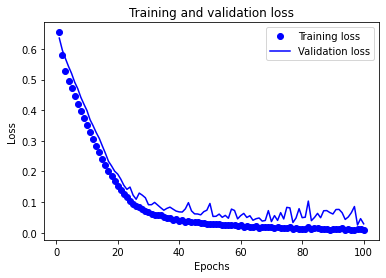

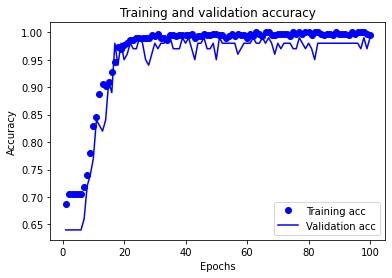

4/4 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9900
[0.029240358620882034, 0.9900000095367432]
16/16 [==============================] - 0s 1ms/step


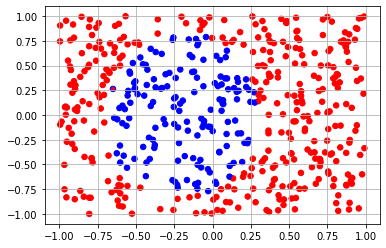

In [ ]:
loss = H.history['loss']
val_loss = H.history['val_loss']
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

results = model.evaluate(test_data, test_label)
print(results)

all_data = np.vstack((train_data, test_data))
all_label = np.vstack((train_label, test_label))
pred = model.predict(all_data)
drawResults(all_data, all_label, pred)

In [ ]:
acc[-1]

NameError: ignored